In [1]:
from src.utils import load_dataset, summarize_clusters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

dataframe = load_dataset()
dataframe.head(10)

,Song,Artist,Length,Genre,Datetime,Star_Rating,User_Name
0,Song254,The Shins,142.0,Indie,2023-07-23 07:42:08.095267,4,Alice
1,Song54,Arcade Fire,218.0,Indie,2023-07-13 17:12:08.095267,3,Alice
2,Song153,Moby,133.0,Techno,2023-07-30 11:00:08.095267,5,Alice
3,Song124,Vampire Weekend,135.0,Indie,2023-07-22 18:23:08.095267,3,Alice
4,Song194,The Shins,172.0,Indie,2023-07-19 21:21:08.095267,3,Alice
5,Song123,Carl Cox,352.0,Techno,2023-08-03 11:01:08.095267,2,Alice
6,Song114,Death Cab for Cutie,265.0,Indie,2023-07-10 04:32:08.095267,3,Alice
7,Song123,Carl Cox,352.0,Techno,2023-07-22 04:21:08.095267,3,Alice
8,Song167,Dolly Parton,154.0,Country,2023-07-07 23:27:08.095267,5,Alice
9,Song194,The Shins,172.0,Indie,2023-07-06 05:17:08.095267,4,Alice


# Clustering similar users

First we create a user-song matrix in which cells are populated with star-ratings

In [2]:
# Create user-song matrix
user_song_matrix = dataframe.pivot_table(index='User_Name', columns='Song', values='Star_Rating', fill_value=0)
print(user_song_matrix.describe())      # very sparse matrix
print(user_song_matrix.sample(5))


Song       Song0      Song1     Song10    Song100    Song101    Song102  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    0.650000   0.450000   0.875000   0.925000   0.700000   0.587500   
std     1.598519   1.145931   1.820027   1.907568   1.550891   1.533132   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     5.000000   4.000000   5.000000   5.000000   5.000000   5.000000   

Song     Song103    Song104    Song105    Song106  ...     Song90     Song91  \
count  20.000000  20.000000  20.000000  20.000000  ...  20.000000  20.000000   
mean    0.500000   1.075000   0.500000   0.750000  ...   0.550000   0.940000   
std     1.538968   1.793812   1.538968   1.560196  ...   1.134391   1.938095   
min 

# Using silhouette distance to determine best cluster

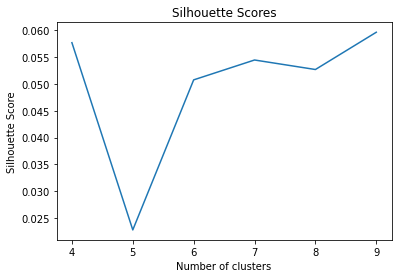

Cluster 0 Users (Silhouette Method): ['Rachel']
Cluster 1 Users (Silhouette Method): ['Charlie', 'Frank', 'Grace', 'Ivy', 'Jack', 'Karen', 'Nancy', 'Tom']
Cluster 2 Users (Silhouette Method): ['Bob', 'David', 'Oliver', 'Paul', 'Steve']
Cluster 3 Users (Silhouette Method): ['Hannah']
Cluster 4 Users (Silhouette Method): ['Liam']
Cluster 5 Users (Silhouette Method): ['Quincy']
Cluster 6 Users (Silhouette Method): ['Emily']
Cluster 7 Users (Silhouette Method): ['Monica']
Cluster 8 Users (Silhouette Method): ['Alice']


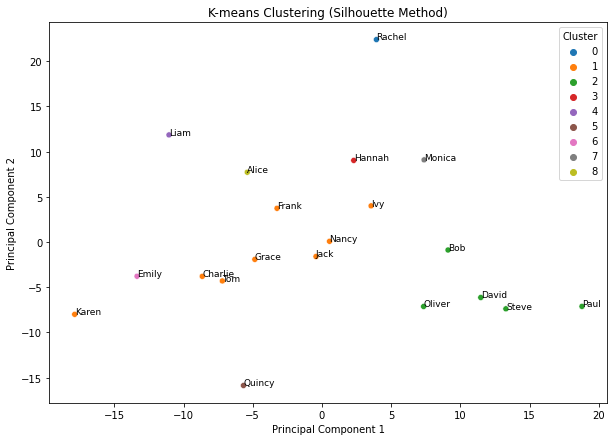

In [3]:
# Since we will be clustering, we need to standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_song_matrix)

# Determine optimal number of clusters using silhouette method
silhouette_scores = []
for n_clusters in range(4, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters_silhouette = silhouette_scores.index(max(silhouette_scores)) + 4
plt.plot(range(4, 10), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# K-means Clustering using optimal number from silhouette method
kmeans = KMeans(n_clusters=optimal_clusters_silhouette)
kmeans_clusters = kmeans.fit_predict(scaled_data)
user_song_matrix['kmeans_cluster_silhouette'] = kmeans_clusters

# Display clusters silhouette
for cluster_num in range(optimal_clusters_silhouette):
    users_in_cluster = user_song_matrix[user_song_matrix['kmeans_cluster_silhouette'] == cluster_num].index.tolist()
    print(f"Cluster {cluster_num} Users (Silhouette Method): {users_in_cluster}")

#
# plot clusters
#
# Reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(user_song_matrix)

# Create a DataFrame to make plotting easier
plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_df['Cluster'] = kmeans_clusters
plot_df['Username'] = user_song_matrix.index  # Assuming user_names is a list of usernames in the same order as the rows in user_song_matrix

# Make a scatter plot of the data, coloring the points by cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=plot_df, palette='tab10')

# Add the user names to the plot
for i, user_name in enumerate(plot_df['Username']):
    plt.text(plot_df.loc[i, 'PC1'], plot_df.loc[i, 'PC2'], user_name, fontsize=9)

plt.title('K-means Clustering (Silhouette Method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Processing cluster number: 0
Users in cluster: ['Rachel']


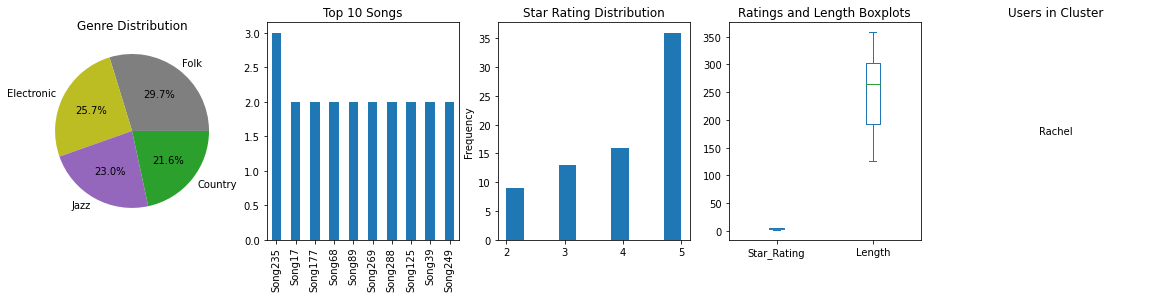

Processing cluster number: 1
Users in cluster: ['Charlie', 'Frank', 'Grace', 'Ivy', 'Jack', 'Karen', 'Nancy', 'Tom']


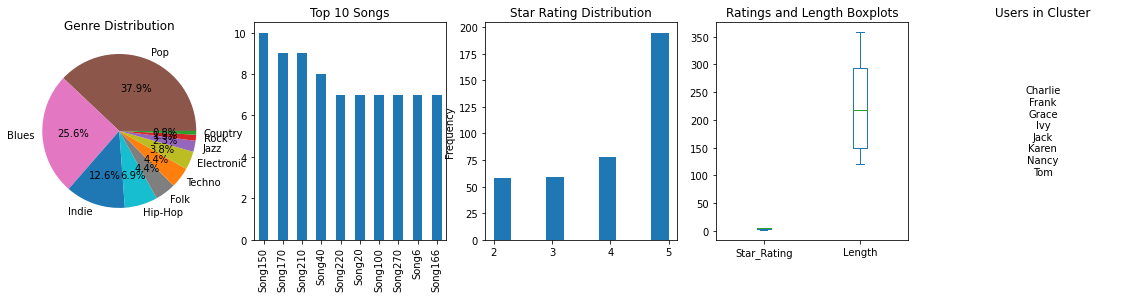

Processing cluster number: 2
Users in cluster: ['Bob', 'David', 'Oliver', 'Paul', 'Steve']


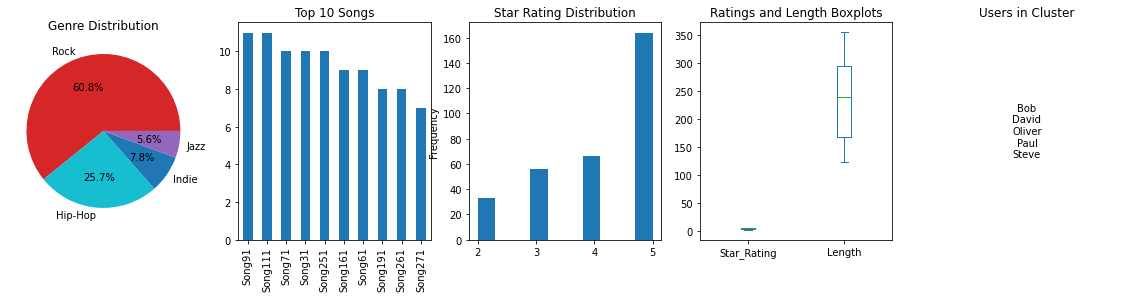

Processing cluster number: 3
Users in cluster: ['Hannah']


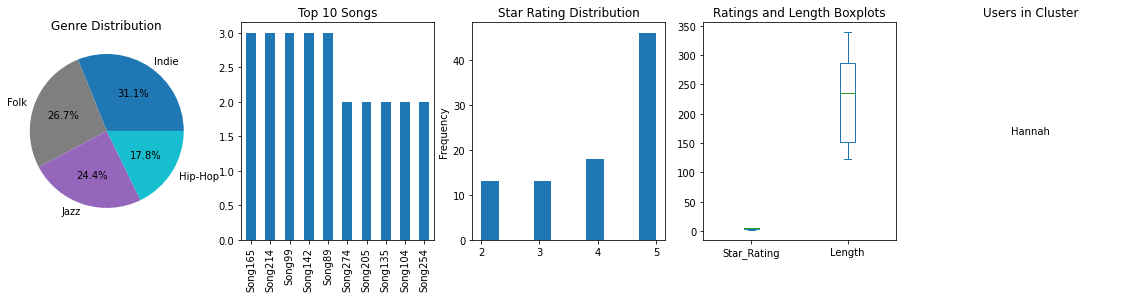

Processing cluster number: 4
Users in cluster: ['Liam']


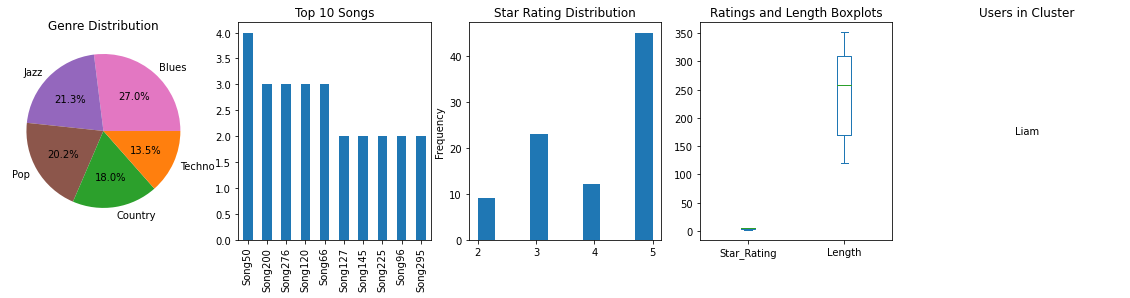

Processing cluster number: 5
Users in cluster: ['Quincy']


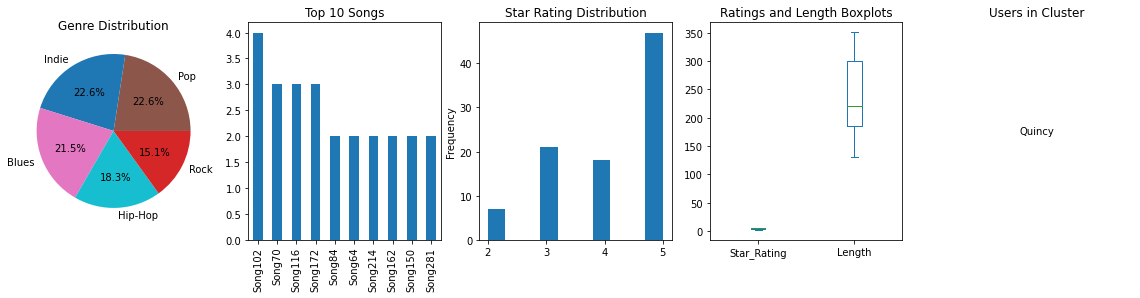

Processing cluster number: 6
Users in cluster: ['Emily']


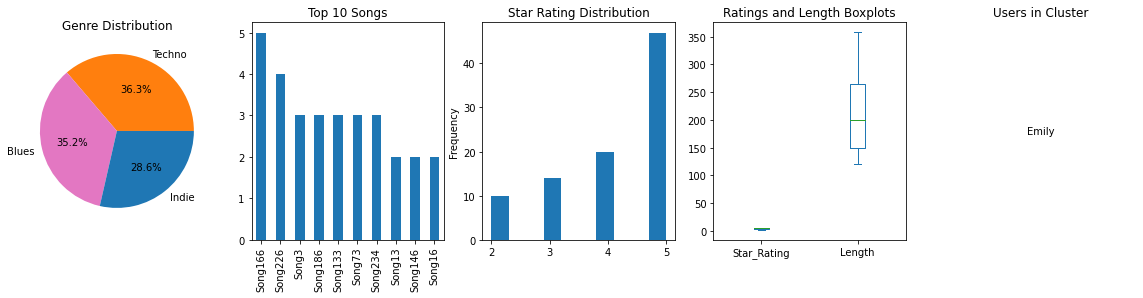

Processing cluster number: 7
Users in cluster: ['Monica']


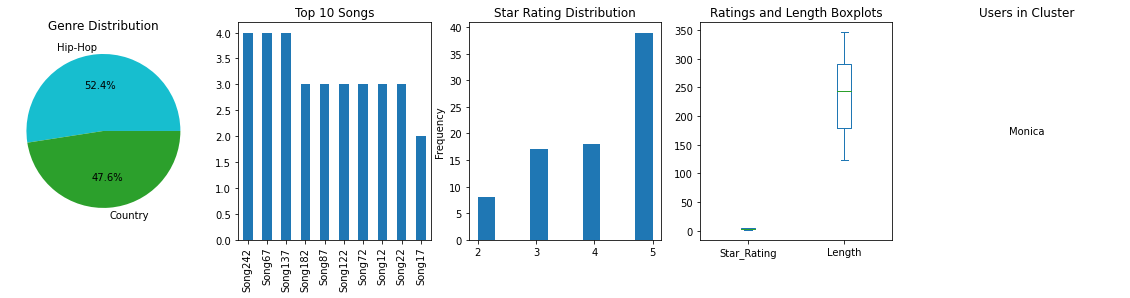

Processing cluster number: 8
Users in cluster: ['Alice']


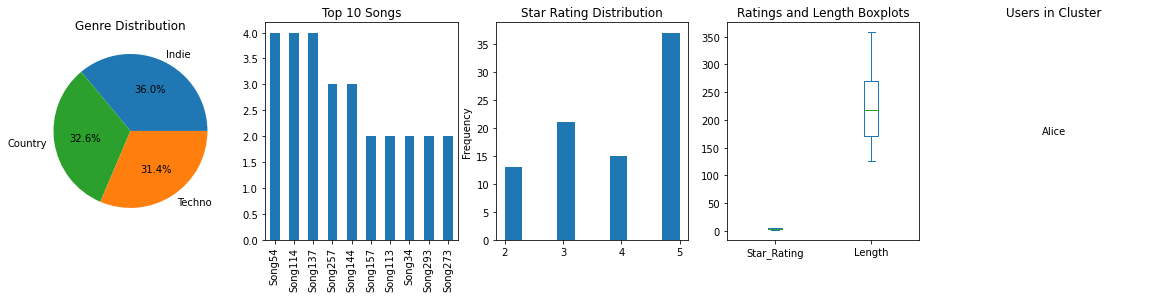

In [4]:
summarize_clusters(dataframe, kmeans_clusters, user_song_matrix)

# Using elbow method to determine cluster selection measurement

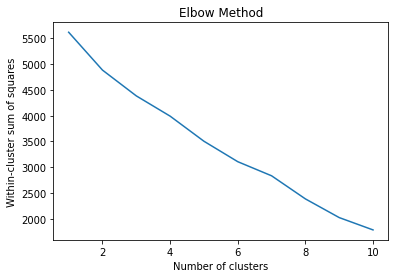

optimal_clusters_elbow 7
Cluster 0 Users (Elbow Method): ['Bob', 'David', 'Frank', 'Grace', 'Ivy', 'Nancy', 'Oliver', 'Paul', 'Steve']
Cluster 1 Users (Elbow Method): ['Rachel']
Cluster 2 Users (Elbow Method): ['Charlie', 'Jack', 'Karen', 'Quincy', 'Tom']
Cluster 3 Users (Elbow Method): ['Emily']
Cluster 4 Users (Elbow Method): ['Alice', 'Monica']
Cluster 5 Users (Elbow Method): ['Liam']
Cluster 6 Users (Elbow Method): ['Hannah']


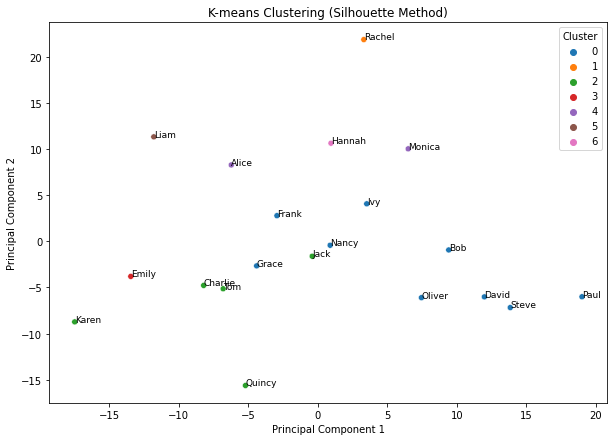

In [5]:
import numpy as np
from scipy.spatial.distance import cdist

# Do the same but using elbow score to determine the nuber of clusters
wcss = []
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Here, you should visually inspect the plot to determine the elbow point (let's assume it's 5)
changes = [100 * (distortions[i] - distortions[i - 1]) / distortions[i - 1] for i in range(1, len(distortions))]
elbow_point = np.argmin(changes) + 1  # Add 1 because the range started at 1
optimal_clusters_elbow = elbow_point
print(f"optimal_clusters_elbow {optimal_clusters_elbow}")

# K-means Clustering using optimal number from elbow method
kmeans = KMeans(n_clusters=optimal_clusters_elbow)
kmeans_clusters = kmeans.fit_predict(scaled_data)
user_song_matrix['kmeans_cluster_elbow'] = kmeans_clusters

# Display clusters
for cluster_num in range(optimal_clusters_elbow):
    users_in_cluster = user_song_matrix[user_song_matrix['kmeans_cluster_elbow'] == cluster_num].index.tolist()
    print(f"Cluster {cluster_num} Users (Elbow Method): {users_in_cluster}")

#
# plot clusters
#
# Reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(user_song_matrix)

# Create a DataFrame to make plotting easier
plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_df['Cluster'] = kmeans_clusters
plot_df['Username'] = user_song_matrix.index  # Assuming user_names is a list of usernames in the same order as the rows in user_song_matrix

# Make a scatter plot of the data, coloring the points by cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=plot_df, palette='tab10')

# Add the user names to the plot
for i, user_name in enumerate(plot_df['Username']):
    plt.text(plot_df.loc[i, 'PC1'], plot_df.loc[i, 'PC2'], user_name, fontsize=9)

plt.title('K-means Clustering (Silhouette Method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Processing cluster number: 0
Users in cluster: ['Rachel']


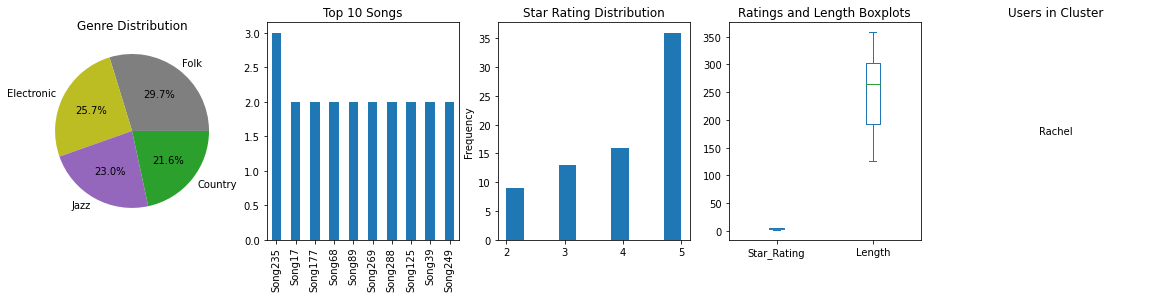

Processing cluster number: 1
Users in cluster: ['Charlie', 'Frank', 'Grace', 'Ivy', 'Jack', 'Karen', 'Nancy', 'Tom']


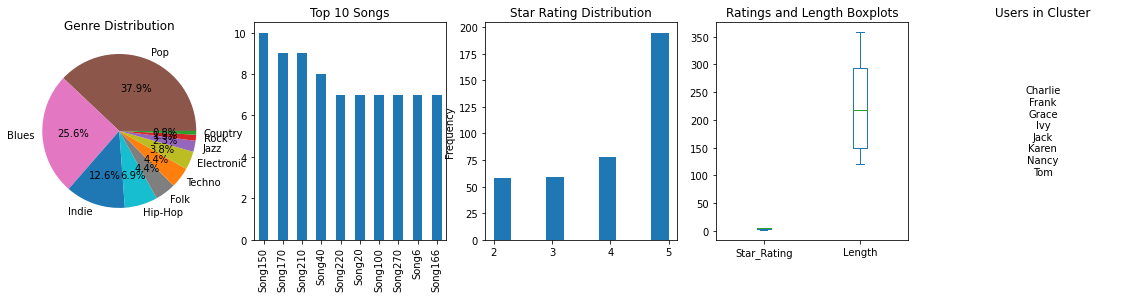

Processing cluster number: 2
Users in cluster: ['Bob', 'David', 'Oliver', 'Paul', 'Steve']


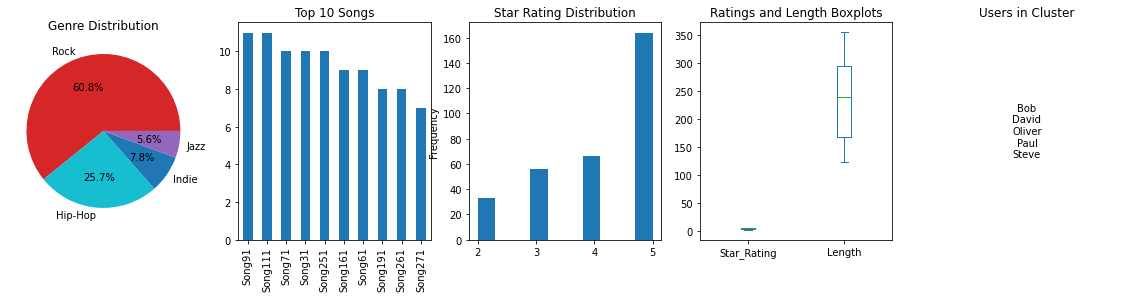

Processing cluster number: 3
Users in cluster: ['Hannah']


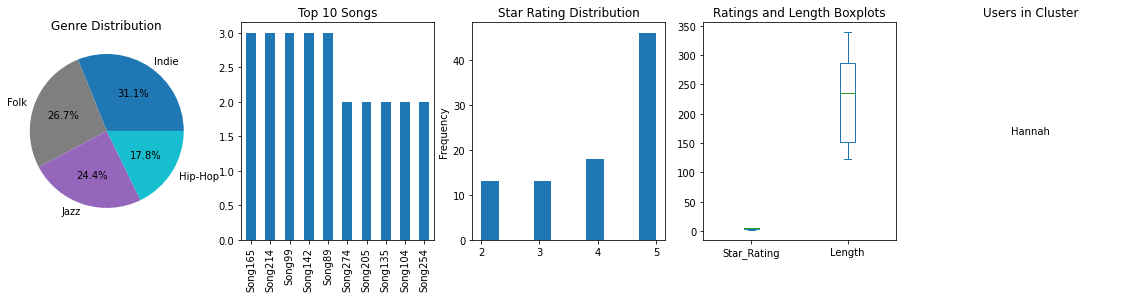

Processing cluster number: 4
Users in cluster: ['Liam']


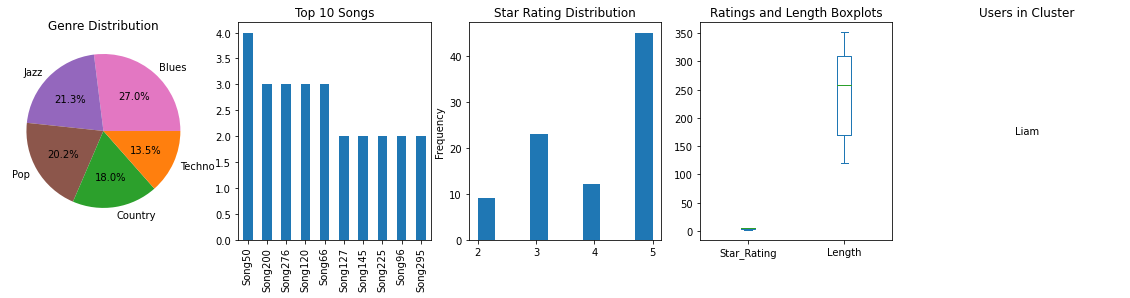

Processing cluster number: 5
Users in cluster: ['Quincy']


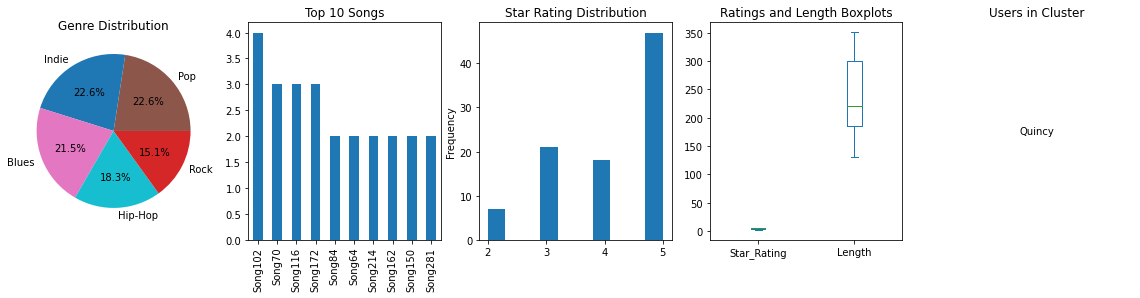

Processing cluster number: 6
Users in cluster: ['Emily']


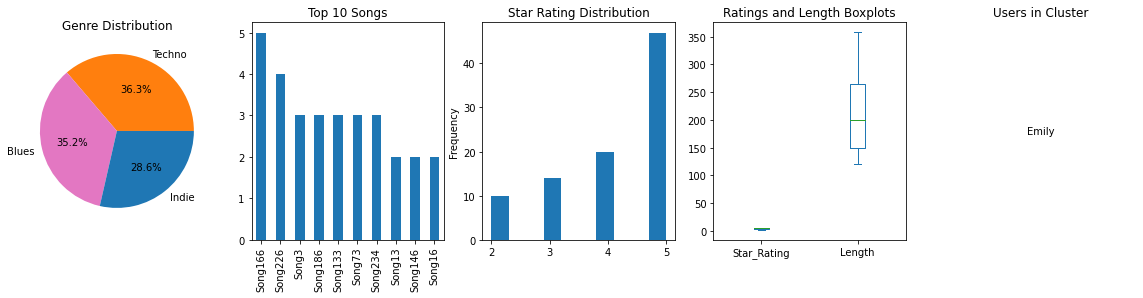

In [6]:
summarize_clusters(dataframe, kmeans_clusters, user_song_matrix)